<a href="https://colab.research.google.com/github/alexc6h6/Classification-Model/blob/master/Decision_Tree_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#loading datasets
train = pd.read_csv('/content/drive/My Drive/titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/content/drive/My Drive/titanic/test.csv', index_col = 'PassengerId')


In [4]:
#the passengers survived is the labels 
labels = train['Survived'].values

print(labels.shape)


(891,)


In [0]:
train.drop(columns = 'Survived', inplace = True)

In [0]:
data = pd.concat([train, test], axis = 0)

In [7]:
#there are several missing values in age, fare, cabin, embarked columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [0]:
#fill missing values 
data['Age'] = data['Age'].fillna(value = data['Age'].median())
data['Fare'] = data['Fare'].fillna(value = data['Fare'].mean())
data['Embarked'] = data['Embarked'].fillna(value = data['Embarked'].mode()[0])

In [0]:
#generate new families column 
data['Families'] = data['SibSp'] + data['Parch'] + 1

In [0]:
#generate new column that the passenger take the ship alone or with families
data['Alone'] = 1
data.loc[data['Families'] > 1, 'Alone'] = 0

In [11]:
#generate new title column by extracting the title from name column
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

data['Title'] = data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
data['Title'] = data['Title'].replace('Lady', 'Mrs')
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Sir', 'Capt', 'Dona', 'Countess', 'Jonkheer'], 'Rare')

data['Title'].value_counts()

Mr        757
Miss      265
Mrs       198
Master     61
Rare       28
Name: Title, dtype: int64

In [0]:
#drop cabin column which has too many missing valus
#drop ticket and name columns
data.drop(columns = ['Cabin', 'Ticket', 'Name'], inplace = True)

In [13]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Families  1309 non-null   int64  
 8   Alone     1309 non-null   int64  
 9   Title     1309 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 112.5+ KB
(1309, 10)


In [0]:
col_1 = ['Pclass', 'Sex', 'Embarked', 'Title', 'Alone']
col_2 = ['Age', 'SibSp', 'Parch', 'Fare', 'Families']

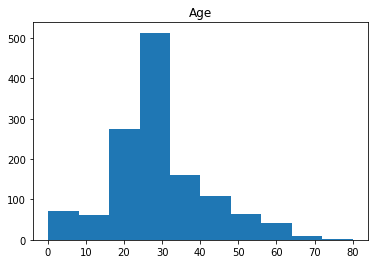

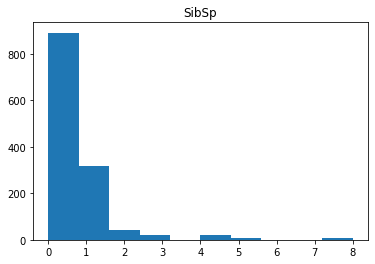

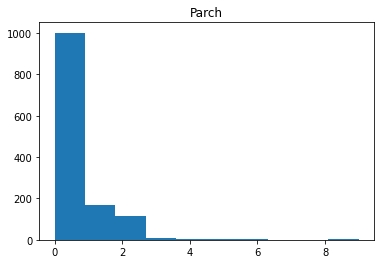

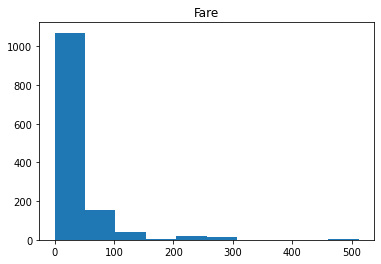

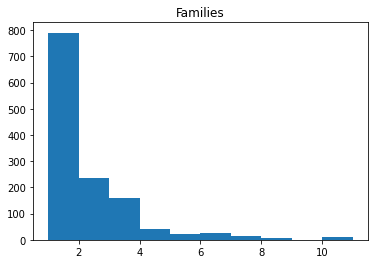

In [22]:
#visulize features
for col in col_2:
  plt.hist(data[col], bins = 10)
  plt.title(col)
  plt.show()

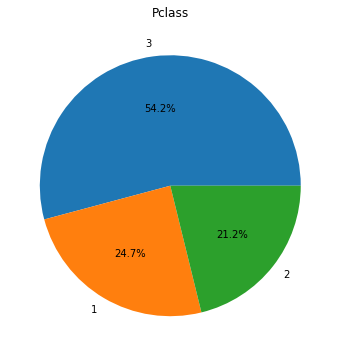

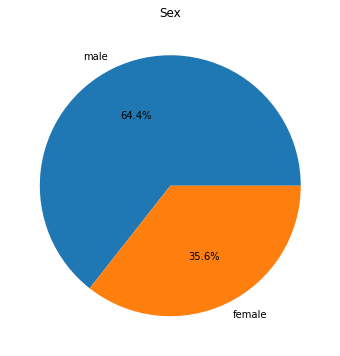

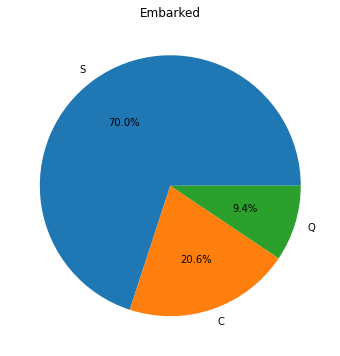

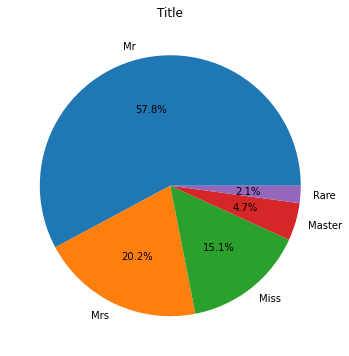

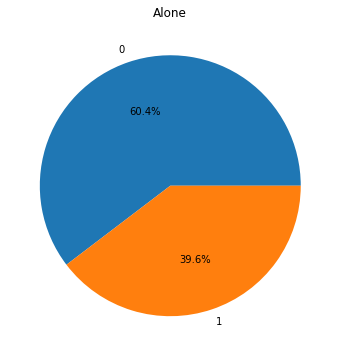

In [23]:
#visulize features

for col in col_1:
  fig = plt.figure(figsize=(6, 6))
  plt.pie(data[col].value_counts(), autopct = '%1.1f%%', labels = data[col].unique())
  plt.title(col)
  plt.show()

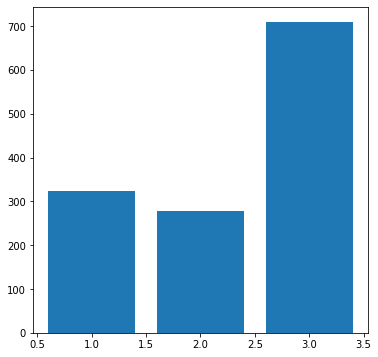

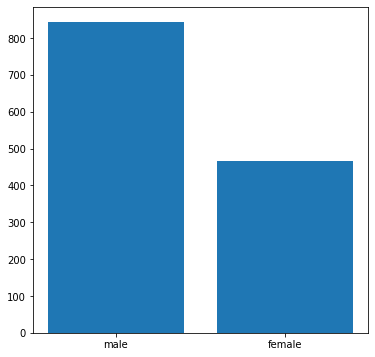

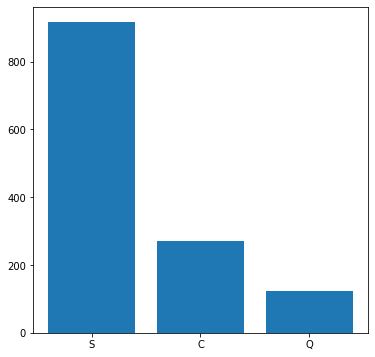

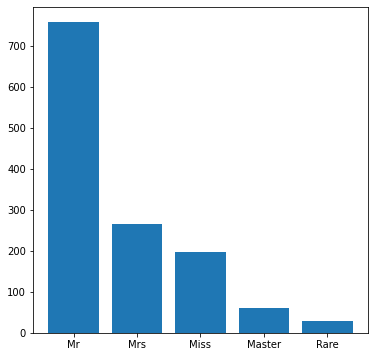

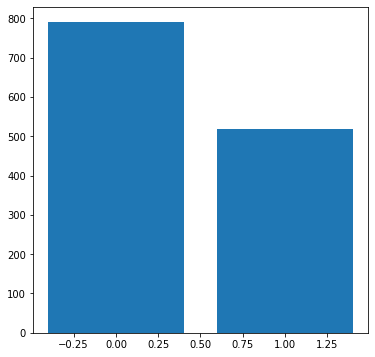

In [27]:
for col in col_1:
  fig = plt.figure(figsize = (6,6))
  plt.bar(data[col].unique(), data[col].value_counts())
  plt.show()


In [28]:
#transform categorical features to one hot code
columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'Alone']
for i in columns:
  data[i] = data[i].astype('object')

data = pd.get_dummies(data)

print(data.shape)
data.info()


(1309, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1309 non-null   float64
 1   SibSp         1309 non-null   int64  
 2   Parch         1309 non-null   int64  
 3   Fare          1309 non-null   float64
 4   Families      1309 non-null   int64  
 5   Pclass_1      1309 non-null   uint8  
 6   Pclass_2      1309 non-null   uint8  
 7   Pclass_3      1309 non-null   uint8  
 8   Sex_female    1309 non-null   uint8  
 9   Sex_male      1309 non-null   uint8  
 10  Embarked_C    1309 non-null   uint8  
 11  Embarked_Q    1309 non-null   uint8  
 12  Embarked_S    1309 non-null   uint8  
 13  Alone_0       1309 non-null   uint8  
 14  Alone_1       1309 non-null   uint8  
 15  Title_Master  1309 non-null   uint8  
 16  Title_Miss    1309 non-null   uint8  
 17  Title_Mr      1309 non-null   uint8  
 18  Title_Mrs     130

In [0]:
#feature scaling
sc = StandardScaler()

data = sc.fit_transform(data)

In [0]:
train_data = data[:891]
test_data = data[891:]

In [0]:
#split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_data, labels, test_size = 0.1)

# Decision Tree Classifier

![alt text](https://elf11.github.io/images/decisionTree.png)

In [34]:
#decision tree model
tree = DecisionTreeClassifier(criterion = 'gini')

tree.fit(x_train, y_train)
prediction = tree.predict(x_val)
acc = accuracy_score(y_val, prediction)

print('Tree ACC: ' + str(acc))

Tree ACC: 0.8111111111111111


# Random Forest Classifier

![alt text](https://miro.medium.com/max/2340/1*58f1CZ8M4il0OZYg2oRN4w.png)

In [37]:
#random forest
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 10)

forest.fit(x_train, y_train)
prediction = forest.predict(x_val)
acc = accuracy_score(y_val, prediction)

print('Forest ACC: '+ str(acc))

Forest ACC: 0.8666666666666667
